<a href="https://colab.research.google.com/github/TUIlmenauAMS/CoronaComputationPrograms/blob/master/coronaconcucrrentlysick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate Change Calculated, Corona Update 2

Prof. Dr.-Ing. G. Schuller

Ilmenau University of Technology

Institute for Media Technology

July, 2020


## Comparison of infection risk in different countries

The numbers of recovered and deaths became significant, so that they must be taken into account in the calculation.
The number of concurrently sick is the number of infected minus the number of recovered and deaths.

Database is the Johns-Hopkins GitHub repository
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series

The countries to compute and plot are set in the variable "coutries", their population in Millions in the variable "population", and the starting date of the plots in the variable "statdate", see below.

To obtain the newest data, go to the menue above and click on "Runtime - Run All". To recompute a cell, click on the cell and then on the play button.

countries= ['Italy', 'Germany', 'Spain', 'Brazil', 'US', 'Russia', 'Korea, South', 'Austria', 'Lebanon', 'India', 'France']
Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Detected Concurrently sick internationally')

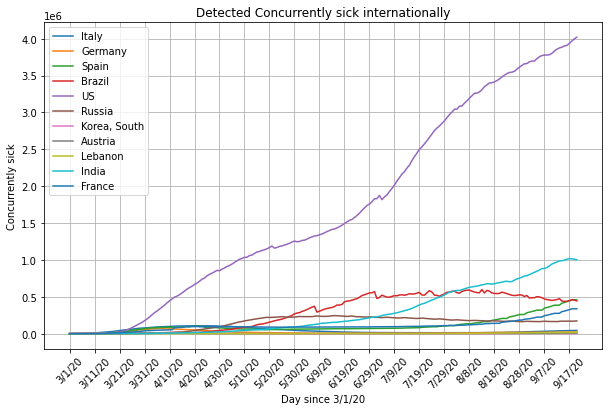

In [1]:
#Number of concurrently sick from data from JHU github
#Computes the difference of detected infected minus recovered minus deaths
#Gerald Schuller, May 2020

countries = ['Italy', 'Germany', 'Spain', 'Brazil', 'US', 'Russia','Korea, South', 'Austria', 'Lebanon', 'India','France']
population=[60.36, 83.02, 46.94, 209.5, 328.2, 144.5, 51.64, 8.859, 6.849, 1353, 67]
#countries = ['Germany', 'US']
#population=[60.36, 328.2]
startdate='3/1/20'

import numpy as np
import matplotlib
#matplotlib.use('nbagg')
import matplotlib.pyplot as plt

#Read data from github:
import urllib.request
import pandas as pd

Retrievedata=True

#Cases
if Retrievedata:
   url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
   urllib.request.urlretrieve(url, './corona_cases.csv')
#('./corona_cases.csv', <http.client.HTTPMessage object at 0x7fc7d89c0f98>)
   url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
   urllib.request.urlretrieve(url, './corona_recovered.csv')
   url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
   urllib.request.urlretrieve(url, './corona_deaths.csv')



print("countries=", countries)

#detected cases:
df = pd.read_csv('./corona_cases.csv')
df=df.loc[df['Province/State'].isnull()] #remove overseas territories, e.g. for UK
#df.head()
df=df.drop(['Lat','Long','Province/State'], axis=1)
df=df.set_index('Country/Region')
datacases=df.loc[countries,: ]

#recovered cases:
df = pd.read_csv('./corona_recovered.csv')
df=df.loc[df['Province/State'].isnull()] #remove overseas territories, e.g. for UK
#df.head()
df=df.drop(['Lat','Long','Province/State'], axis=1)
df=df.set_index('Country/Region')
datarecovered=df.loc[countries,: ]

#death cases:
df = pd.read_csv('./corona_deaths.csv')
df=df.loc[df['Province/State'].isnull()] #remove overseas territories, e.g. for UK
#df.head()
df=df.drop(['Lat','Long','Province/State'], axis=1)
df=df.set_index('Country/Region')
datadeaths=df.loc[countries,: ]

dates=datacases.loc[countries[0],startdate:].index
#print("dates=\n",dates)

countrycases=datacases.loc[countries,startdate:].reset_index(drop=True)
countrycases=np.array(countrycases)
countryrecovered=datarecovered.loc[countries,startdate:].reset_index(drop=True)
countryrecovered=np.array(countryrecovered)
countrydeaths=datadeaths.loc[countries,startdate:].reset_index(drop=True)
countrydeaths=np.array(countrydeaths)
concurrentlysick=countrycases-countryrecovered-countrydeaths #factor of increase f for each country

#%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

fig, ax = plt.subplots(1,1) 
ax.plot(dates,concurrentlysick.T)
ax.set_xticks(np.arange(0,len(dates),10))
plt.xticks(rotation=45)

#plt.plot(concurrentlysick.T)
plt.legend(countries)
plt.xlabel('Day since '+startdate)
plt.ylabel('Concurrently sick')
plt.grid()
plt.title('Detected Concurrently sick internationally')
#plt.show()


## Concurrently sick per million inhabitants

Since countries have very different populations, it makes sense to calculate the concurrently sick per million inhabitants.
It is obtained by dividing the number of concurrently sick by the number of inhabitants in millions.
This is also what is needed to estimate the risk of infection. To get a more accurate estimate, it should be multiplied by the rough under detection rate (not included here for simplicity).

<Figure size 720x720 with 0 Axes>

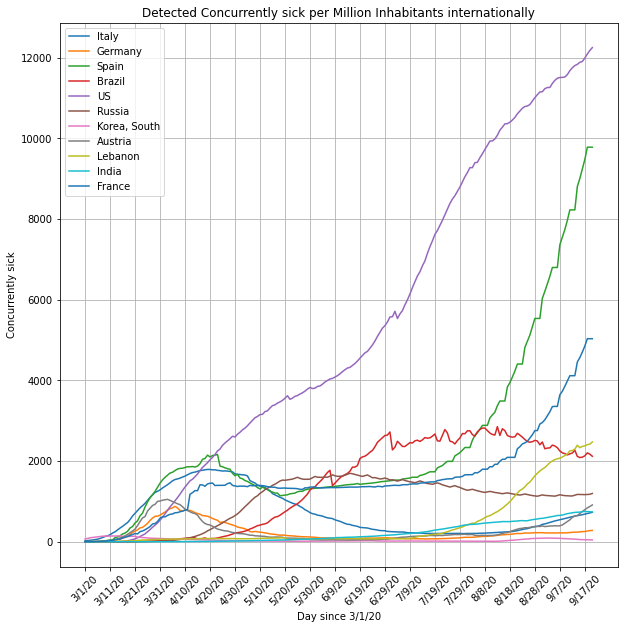

<Figure size 720x720 with 0 Axes>

In [2]:
pylab.rcParams['figure.figsize'] = (10, 10)
#print("concurrentlysick.T.shape", concurrentlysick.T,"population.shape", population)
fig, ax = plt.subplots(1,1) 
ax.plot(dates,concurrentlysick.T/population)
ax.set_xticks(np.arange(0,len(dates),10))
plt.xticks(rotation=45)
#plt.plot(concurrentlysick.T/population)
plt.legend(countries)
plt.xlabel('Day since '+startdate)
plt.ylabel('Concurrently sick')
plt.grid()
plt.title('Detected Concurrently sick per Million Inhabitants internationally')
#plt.axis([1,31,0, 2])
#plt.show()
plt.figure()

## Underdetection Rate

The underdetection rate takes into account how much testing is done, including its accuracy. It is an estimate of how many more true infected there are compared to the detected infected. It is computed as the ratio of the case fatality rate to the infection based fatality rate. The estimation of the infection based fatality rate varies (usually 0.6% to 5%), and is assumed to be 2% here (see my Corona Update Video). This can also differ somewhat between countries, depending on the average age of the population and the health system, so the 2% is a more or less rough estimate. The case fatality rate is computed as (# of deaths)/(# of death + # of recovered), here using the accumulated data to obtain more stable results. This works only for countries who report the number of recovered (not e.g. Sweden).
Observe how testing became clearly better of time, reducing the underdetection rate.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


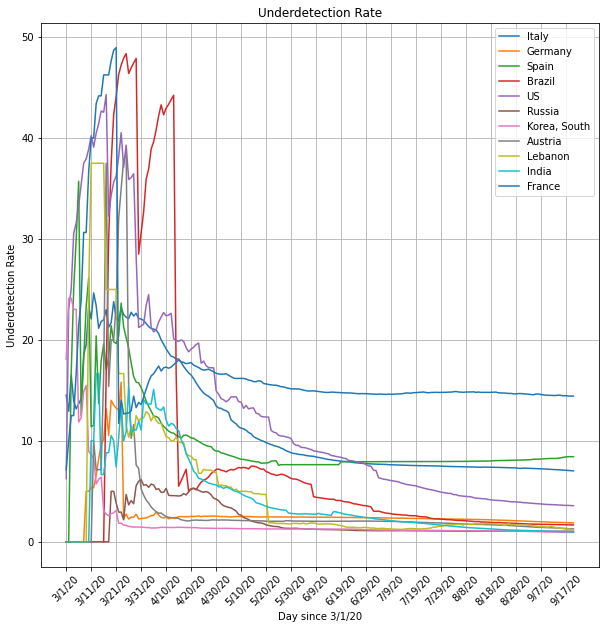

In [3]:
casefatalityrate=countrydeaths/(countryrecovered+countrydeaths) #case fatality rate
underdetectionrate=casefatalityrate/0.02 #underdetection rate = case fatality rate / infection fatality rate( 0.02)
pylab.rcParams['figure.figsize'] = (10, 10)
fig, ax = plt.subplots(1,1) 
ax.plot(dates,underdetectionrate.T)
ax.set_xticks(np.arange(0,len(dates[1:]),10))
plt.xticks(rotation=45)
#plt.plot(currsickfactorsofincrease.T)
plt.legend(countries)
plt.xlabel('Day since '+startdate)
plt.ylabel('Underdetection Rate')
plt.grid()
plt.title('Underdetection Rate')
#plt.axis([len(dates)-120, len(dates),1.0, 10])
#ax.set_ylim(bottom=0.5, top=1.3)
plt.show()

## Estimated True Concurrently Sick
We can multiply our number of the concurrently sick (detection based) by the underdetection rate above to obtain an estimate of the true concurrently sick (infection based). 

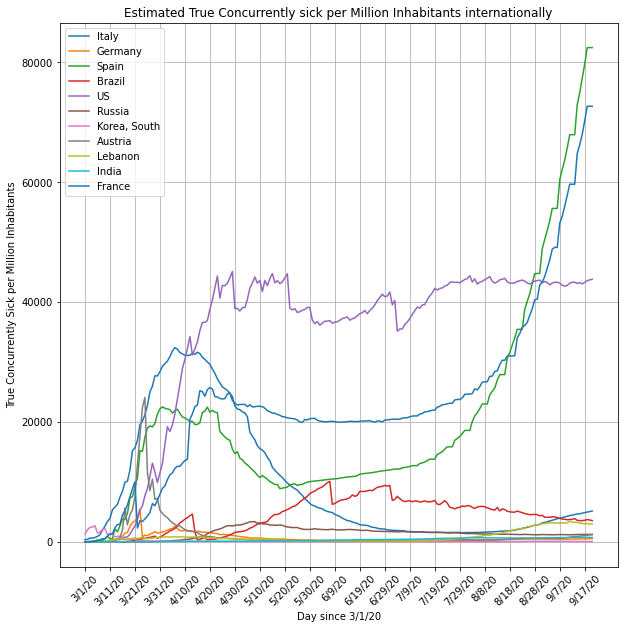

In [4]:
trueconcurrentlysick=underdetectionrate*concurrentlysick
tcspm=trueconcurrentlysick.T/population

pylab.rcParams['figure.figsize'] = (10, 10)
fig, ax = plt.subplots(1,1) 
ax.plot(dates,tcspm)
ax.set_xticks(np.arange(0,len(dates[1:]),10))
plt.xticks(rotation=45)
plt.legend(countries)
plt.xlabel('Day since '+startdate)
plt.ylabel('True Concurrently Sick per Million Inhabitants')
plt.grid()
plt.title('Estimated True Concurrently sick per Million Inhabitants internationally')
#plt.axis([len(dates)-120, len(dates),1.0, 10])
#ax.set_ylim(bottom=0.5, top=1.3)
plt.show()

The following plot is more interactive. After running it (with 'Runtime-Run all') you can hover over a line with the mouse pointer to see which country it is, and you can use a zoom tool (activated with the tool box on the upper right side of the plot), panning, and saving to file.

In [5]:
!pip install bokeh
import bokeh.io
bokeh.io.output_notebook()
import bokeh.plotting
from bokeh.palettes import Spectral11, mpl
from bokeh.models import HoverTool
from bokeh.models import FixedTicker, DatetimeTicker
from bokeh.models import DatetimeTickFormatter, LinearAxis

trueconcurrentlysick=underdetectionrate*concurrentlysick
tcspm=trueconcurrentlysick.T/population

mpl11=mpl['Magma'][11]
hover = HoverTool(names=countries)
hover.tooltips = [("Country:","$name"),("True Conc.sick=", "$y")]
f = bokeh.plotting.figure(title='Estimated True Concurrently sick per Million Inhabitants internationally', x_range=dates.values,x_axis_label='Day since '+startdate, y_axis_label='True Concurrently Sick per Million Inhabitants', tools=[hover,",pan,wheel_zoom,box_zoom,reset,save"], plot_width=1100,)
f.xaxis.major_label_orientation = np.pi/4
xnum=np.arange(len(dates.values))
for cnum in range(len(countries)):
   f.line(dates.values, tcspm[:,cnum] , legend_label=countries[cnum], line_width=2, name=countries[cnum],color=mpl11[cnum])
f.legend.location = "top_left"
ticker = DatetimeTicker(desired_num_ticks=10)
xaxis = LinearAxis(ticker=ticker)
f.add_layout(xaxis, 'below')
bokeh.plotting.show(f)

Observe that in this above plot the US has higher numbers earlier on because of their higher underdetection rates earlier, and was surpassed by Spain and France in the end of August.

## Resulting death cases per million inhabitants
The following plot shows the accumulated Corona deaths.

<Figure size 720x432 with 0 Axes>

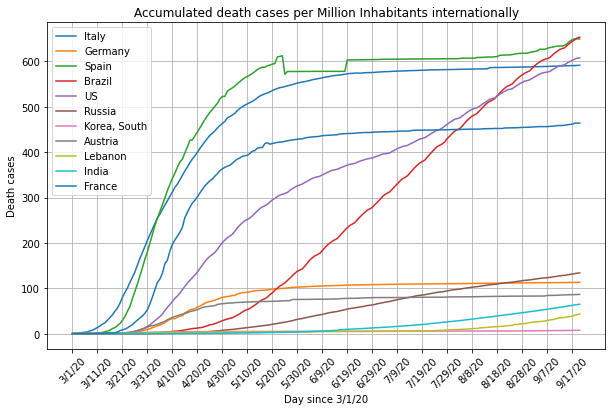

<Figure size 720x432 with 0 Axes>

In [6]:
pylab.rcParams['figure.figsize'] = (10, 6)
fig, ax = plt.subplots(1,1) 
ax.plot(dates,countrydeaths.T/population)
ax.set_xticks(np.arange(0,len(dates),10))
plt.xticks(rotation=45)
#plt.plot(countrydeaths.T/population)
plt.legend(countries)
plt.xlabel('Day since '+startdate)
plt.ylabel('Death cases')
plt.grid()
plt.title('Accumulated death cases per Million Inhabitants internationally')
#plt.axis([1,31,0, 2])
#plt.show()
plt.figure()


## Increase factor of the concurrently sick

For analysis, we can calculate the increase factor of the concurrently sick as a quotient of the numbers for two consecutive days.
This quotient is the same for the absolute numbers or for the number of concurrently sick per million inhabitants.
It is related to the reproductive factor but not the same.

- Values greater than 1: Increase,

- less than 1: decrease,

- a constant value above 1: Exponential growth, similar to a fire that spreads.

This increase factor is almost the same for the true concurrently sick, since the underdetection rate only changes relatively slowly.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


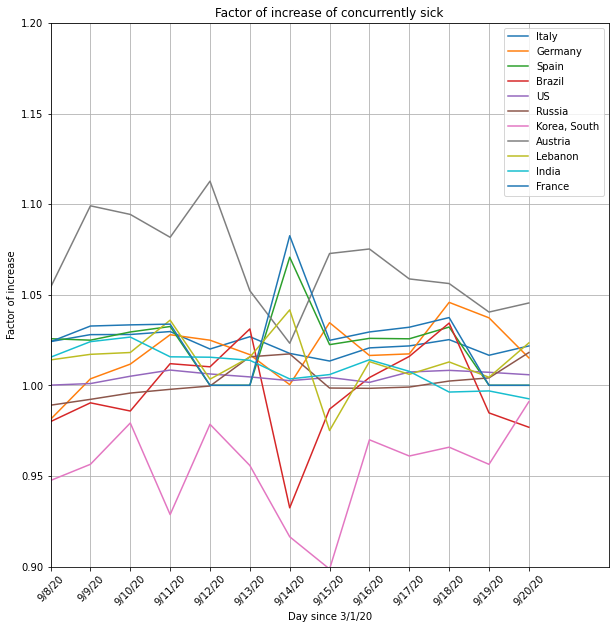

In [7]:
pylab.rcParams['figure.figsize'] = (10, 10)
currsickfactorsofincrease=concurrentlysick[:,1:]/(concurrentlysick[:,:-1]) #factor of increase f for each country
fig, ax = plt.subplots(1,1) 
ax.plot(dates[1:],currsickfactorsofincrease.T)
#ax.set_xticks(np.arange(0,len(dates[1:]),10))
plt.xticks(rotation=45)
#plt.plot(currsickfactorsofincrease.T)
plt.legend(countries)
plt.xlabel('Day since '+startdate)
plt.ylabel('Factor of increase')
plt.grid()
plt.title('Factor of increase of concurrently sick')
plt.axis([len(dates)-14, len(dates),0.9, 1.2])
#ax.set_ylim(bottom=0.5, top=1.3)
plt.show()

Prediction or forecast of the concurrently sick for the next 30 days, based on its average increase factor for the last 7 days:

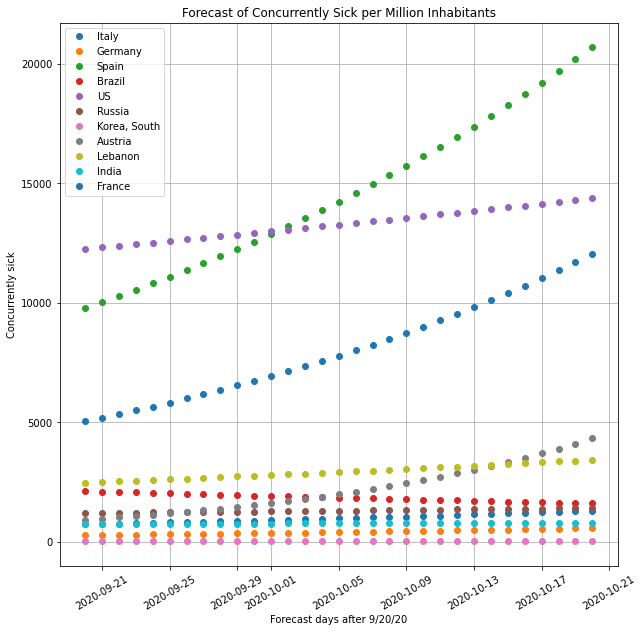

In [8]:
import datetime
from matplotlib.dates import (datestr2num, num2date)

avedays=7 #averaging over the last 7 days for the daily factor of increase
preddays=np.arange(31) #prediction for this number of days

avecurrsickfactorsofincrease=np.sum(currsickfactorsofincrease[:,-avedays:],axis=1)/avedays #average factor of increase
avecurrsickfactorsofincrease=np.expand_dims(avecurrsickfactorsofincrease, axis=1)
#print("average increase factors of concurrently sick:",avecurrsickfactorsofincrease)
concsickpmlast=concurrentlysick[:,-1].T/population  #last value of concurrently sick per million
concsickpmlast=np.expand_dims(concsickpmlast,axis=1)
#print("last values of concurrently sick per million inhabitants:",concsickpmlast)
prediction=np.power(avecurrsickfactorsofincrease,preddays) 
prediction = (concsickpmlast* prediction)  #predicted values of concurrently sick per million

#Plotting:
pylab.rcParams['figure.figsize'] = (10, 10)
fig, ax = plt.subplots(1,1) 
startpreddate=datestr2num(dates[-1])
datesfc=startpreddate+preddays
#print("datesfc=", datesfc)

plt.plot_date(datesfc, prediction.T)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.legend(countries)
plt.xlabel('Forecast days after '+ dates[-1])
plt.ylabel('Concurrently sick')
plt.grid()
plt.title('Forecast of Concurrently Sick per Million Inhabitants')
plt.show()